<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>
$\Large\text{Pontificia Universidad Católica del Perú}$</font>

$$\Large \textit{Estadística Aplicada}$$

$$\large\textbf{Probabilidades - Distribuciones Discretas}$$

_Autores:_

*   Gustavo Mallqui
*   Wilder Cruz
___

### **Distribuciones discretas**






#### **Distribución Bernoulli:**


- Experimento: Lanzamiento de UNA moneda, Número de caras obtenidas, es una variable aleatoria (un valor numérico que está afectado por el azar.)
- Fenómeno o experimento que puede resultar en uno solo de dos posibles resultados, llamados genéricamente ACIERTO (A) o FRACASO (F).
- La probabilidad de acierto p es conocida y por ende la de fracaso que será (1 − p) = q.

![bernoulli](https://imgur.com/xryhFxi.png)

[Distribucion de Bernoulli en wikipedia](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli)

[Distribucion de Bernoulli en scipy.stats - Documentacion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli)

In [5]:
from scipy.stats import bernoulli

p = 0.3
data = bernoulli.rvs(p, size = 100) # Generamos el experimento de forma aleatoria con .rvs()

# Cantidad de valores de la muestra. Media, varianza, simetria, curtosis
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
len(data), mean, var, skew, kurt

(100, 0.3, 0.21, 0.8728715609439694, -1.2380952380952381)

<ipython-input-6-193edc0da1ca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data, bins=10, kde=False, color='blue')


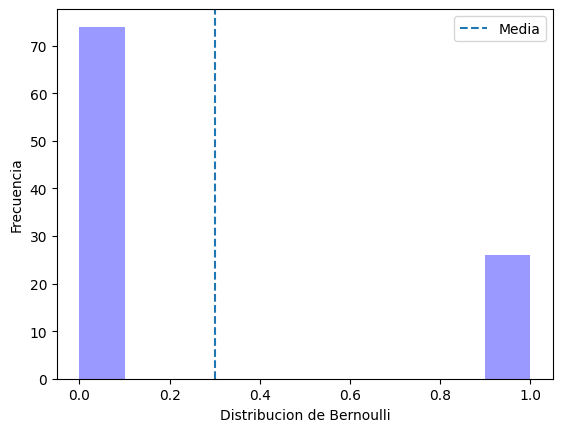

In [6]:
import seaborn as sns

ax = sns.distplot(data, bins=10, kde=False, color='blue')
ax.set(xlabel='Distribucion de Bernoulli', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--', label='Media')
ax.legend()

Vemos que cerca del 70% de los datos es 0 y el 30% es 1, como se esperaba.

#### **Distribución Binomial:**

 sea la distribución de probabilidad Binomial de la siguiente forma:
 $$f(x,n,p)   = {n \choose x} p^x (1-p)^{n-x}$$,  donde: $${n \choose x} = \frac{n!}{x! (n-x)!}$$

**Por ejemplo**, si tiramos 50 veces un dado, cuyas caras tienen una probabilidad $p=\frac{1}{6}$, entonces $f(10,50,\frac{1}{6})$ nos habla de que tan probable es que 10 de las 50 tiradas serán de un número específico.

In [7]:
import matplotlib.pyplot as plt
import math

Definiendo una función en python que representa a la distribución binomial

In [8]:
def binomial(x, n, p):
    factoriales=math.factorial(n)/(math.factorial(x)*math.factorial(n-x))
    probabilidades=p**x * (1-p)**(n-x)
    return factoriales*probabilidades

Dado el ejemplo de los dados, simulamos 6 experimentos lanzando el dado 6, 10, 20, 40, 80, 160 veces

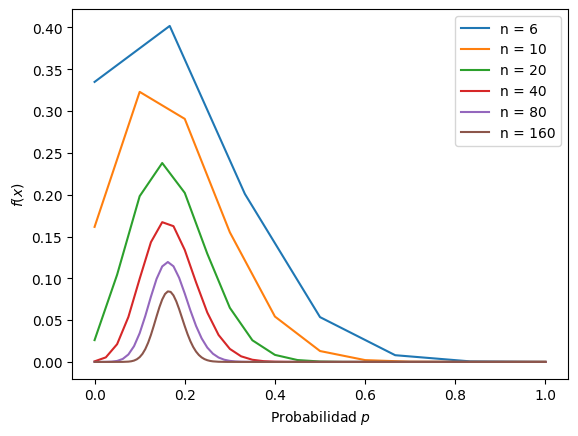

In [9]:
ns=[6, 10, 20, 40, 80, 160]
p=1/6

# Generamos la gráfica para cada una de las simulaciones
for n in ns:
    Xs = [k/n     for k in range(0,n+1)]
    Ys=[binomial(x,n,p)      for x in range(0,n+1)]
    plt.plot(Xs, Ys, label=f'n = {n}')

plt.xlabel('Probabilidad $p$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

**Problema 1:**
Un fabricante de memorias USB afirma que solamente el 4% de sus articulos son defectuosos.


*   (1a) Si un cliente compra un lote de 20 USBs, ¿Cuál es el número esperado de USB defectuosos?
*   (1b) Si el cliente encuentra que 3 de éstas son defectuosas, ¿Debe dudar de la afirmación del vendedor?



In [10]:
# Aplicando la función creada anteriormente para responder 1b
binomial(3, 20, 0.04)

0.036449853488319195

llamando a la libreria de python para responder las preguntas:

In [11]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

Utilizando la función binom(n,p) de la libreria stats

*   n = cantidad de ensayos
*   p = probabilidad de que suceda el evento

Definiendo la función binomial con las caracteristicas del ejercicio para usar en los calculos de probabilidades

In [12]:
X= ss.binom(20,0.04)

**RESPUESTA (1a):**  ¿Cuál es el número esperado de USB defectuosos?

Calculando el promedio = n*p

In [13]:
X.mean()
print(X.mean())

0.8


**RESPUESTA (1b)**

*   pmf(): es la función que calcula la probabilidad de que x tome un valor específico

Calculando la probabilidad de que 3 unidades del lote sean defectuoosos

In [14]:
Xpr=X.pmf(3)
print(Xpr)

0.03644985348831919


**ADICIONAL**


*   sf(): es la función que calcula la suma de las probabilidades acumuladas mayores a un valor específico
*   p(X>3) = p(X=4) + p(X=5) + p(X=6) + p(X=7) + p(X=8) ...




In [15]:
X.sf(3)

0.0074129371128230865

**GRAFICO DE DISTRIBUCIÓN BINOMIAL PARA EL CASO PLANTEADO**

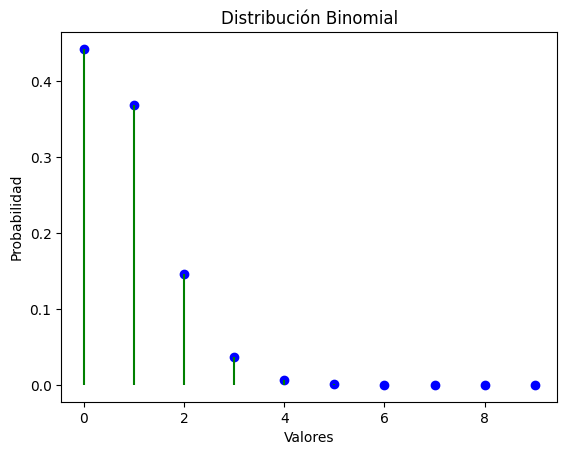

In [16]:
X=ss.binom(20,0.04)
x=np.arange(10)
plt.plot(x,X.pmf(x),"bo")
plt.vlines(x,0,X.pmf(x),"g")
plt.title("Distribución Binomial")
plt.ylabel("Probabilidad")
plt.xlabel("Valores")
plt.show()

Histograma de la realización de 500 experimentos binomiales, de 20 ensayos cada uno y contabilizando la cantidad de exitos obtenidos en cada uno

<ipython-input-17-bf364ca7a285>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=20,p=0.04,size=500),hist=True,kde=False)


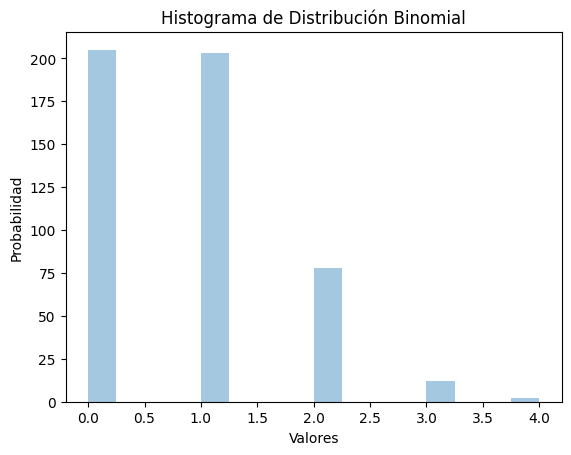

In [17]:
# Histograma
from numpy import random
sns.distplot(random.binomial(n=20,p=0.04,size=500),hist=True,kde=False)
plt.title("Histograma de Distribución Binomial")
plt.ylabel("Probabilidad")
plt.xlabel("Valores")
plt.show()

<ipython-input-18-ade2555027a0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=20,p=0.04,size=500),hist=True,kde=True)


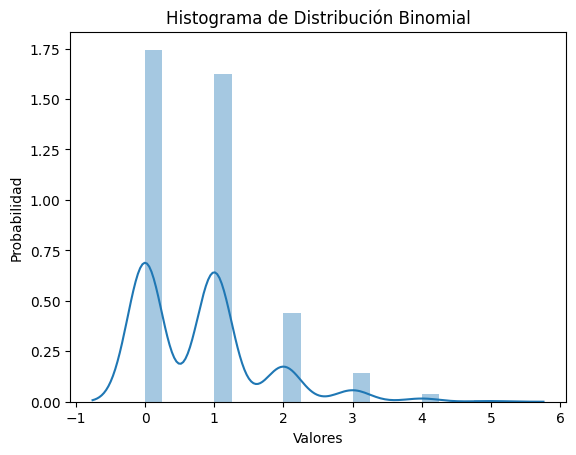

In [18]:
# Histograma ajustando una función de densidad suavizada
from numpy import random
sns.distplot(random.binomial(n=20,p=0.04,size=500),hist=True,kde=True)
plt.title("Histograma de Distribución Binomial")
plt.ylabel("Probabilidad")
plt.xlabel("Valores")
plt.show()

**Problema 2:** Una tienda de hamburguesas recien ha aperturado una nueva sucursal, de estudios previos ha podido calcular la probabilidad que un nuevo cliente le guste la hamburguesa es de 0.8, Si llegan 3 clientes nuevos.

¿Cuál es la probabilidad de que solo 2 de ellos les guste la hamburguesa?

In [19]:
# Definiendo la función binomial y calculando el promedio
X= ss.binom(3,0.8)
X.mean()
print(X.mean())


2.4000000000000004


In [20]:
# Calculando la probabilidad de que solo a 2 de los 3 clientes nuevos le guste la hamburguesa
pr1=X.pmf(2)
print(pr1)

0.384



Explicación si no aplicamos la distribucion binomial y lo desarrollamos.
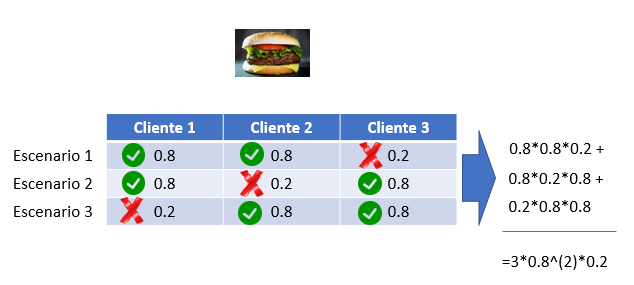



Se obtiene el mismo resultado
0.128*3 = 0.384

#### **Distribución Poisson:**

 sea la distribución de probabilidad Poisson de la siguiente forma:
 $$P(x)   = \frac {e^{-λt} (λt)^{x}}{x!}$$,  donde: \
 ${x}$ : es el número de ocurrencias. \
 ${λ}$ : es la razon media por unidad. \
 ${t}$ : es el número de unidades



- Una binomial se aproxima a una Poisson cuando la probabilidad de éxito es baja.
- Se asocia con fenómenos o sucesos deﬁnidos en determinados intervalos de tiempo y/o regiones de espacio.
- La probabilidad de que el fenómeno suceda por lo menos una vez, es directamente proporcional al tamaño del intervalo de tiempo y/o región espacial.
- La probabilidad de que el fenómeno ocurra más de una vez, en intervalo y/o regiones relativamente pequeños es tan pequeña que se puede despreciar.

[Distribucion de Poisson en wikipedia](https://es.qwe.wiki/wiki/Poisson_distribution)

[Distribucion de Poisson negativa en scipy.stats - Documentacion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)

**Simulando**

In [21]:
from scipy.stats import poisson

lambda_p = 100
data = poisson.rvs(mu=lambda_p , size = 100) # Generamos el experimento de forma aleatoria con .rvs()

# Cantidad de valores de la muestra. Media, varianza, simetria, curtosis
mean, var, skew, kurt = poisson.stats(mu=lambda_p, moments='mvsk')
len(data), mean, var, skew, kurt

(100, 100.0, 100.0, 0.1, 0.01)

<ipython-input-22-59f8c561850a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data, bins=30, kde=False, color='blue')


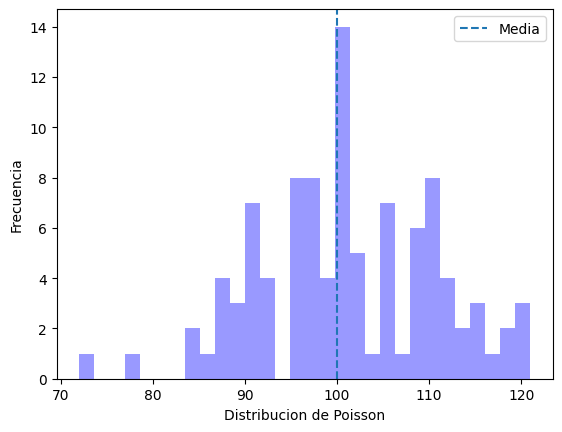

In [22]:
import seaborn as sns
# Graficando el histograma de los 100 valores aleatorios generados con la distribución de poisson
ax = sns.distplot(data, bins=30, kde=False, color='blue')
ax.set(xlabel='Distribucion de Poisson', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--', label='Media')
ax.legend()

En general cuando tienes un dataset y te enfocas en alguna variable numérica además de ver si hay outliers con boxplots y demá. Puede ser interesante analizar la distribución de esa variable y querer generar un modelo para ver que tan probable es que dicha variable tome cierto valor, es decir, P(x=a) luego piensas ¿será que esa variable se distribuye de acuerdo a una dsitribución normal, uniforme, binomial, …etc?. y ahí comienza el análisis.

**Ejemplos**
Una empresa de venta en linea recibe en promedio 6 ordenes por hora. Sabiendo que la cantidad de ordenes que llegan por hora sigue una distribucion de Poisson, calcular:

a) ¿Cual es la probabilidad de que reciba 12 ordenes en una hora?

b) ¿Cual es la probabilidad de que reciba mas de 10 ordenes en una hora?

In [23]:
import numpy as np
from numpy import random
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

Utilizando la función poisson(lambda) de la libreria stats
* lambda = promedio del número de sucesos en el intervalo de tiempo

Definiendo la función poisson con las caracteristicas del ejercicio para usar en los calculos de probabilidades

In [24]:
Y=ss.poisson(6) # número ordenes de compra

**RESPUESTA (a)**

Calculando la probabilidad de que reciba exactamente 12 ordenes en una hora

In [25]:
c=Y.pmf(12)
print(c)

0.011264480021546681


**RESPUESTA (b)**

Calculando la probabilidad acumulada de que reciba mas de 10 ordenes en una hora

In [26]:
c=Y.sf(10)
print(c)

0.042620923582538


Graficando la distribucion de Poisson asociada al ejemplo

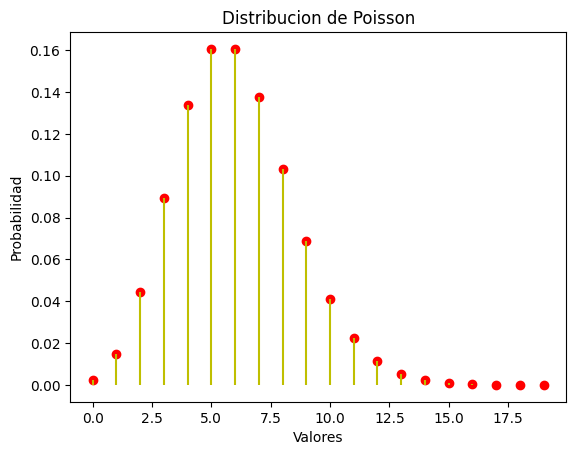

In [27]:
y=np.arange(20)
plt.plot(y,Y.pmf(y),"ro")
plt.vlines(y,0,Y.pmf(y),"y")
plt.title("Distribucion de Poisson")
plt.ylabel("Probabilidad")
plt.xlabel("Valores")
plt.show()

<ipython-input-28-106a483105b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=5,size=200),kde=False)


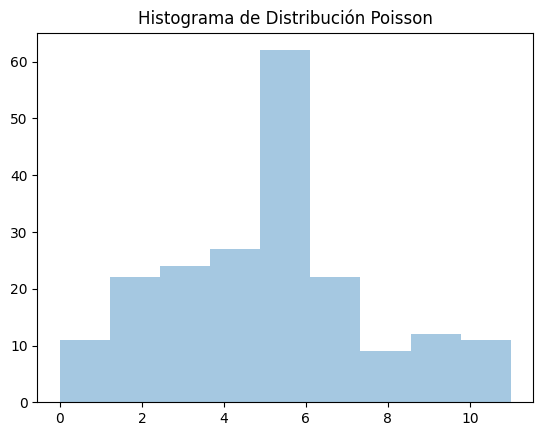

In [28]:
#Histograma a partir de 200 experimentos
from numpy import random
sns.distplot(random.poisson(lam=5,size=200),kde=False)
plt.title("Histograma de Distribución Poisson")
plt.show()

**Problema 1:** Una veterinaria recibe un promedio de 4 pacientes al dia. Sabiendo que el número de pacientes que llegan en un dia sigue una distribucion de Poisson, calcular:

¿Cuál es la probabilidad que lleguen 3 pacientes en un día?

In [29]:
# Definiendo la función de Poisson y calculando la probabilidad de que lleguen 3 pacientes en un día
A=ss.poisson(4)
b=A.pmf(3)
print(b)

0.19536681481316454


¿Cuál es la probabilidad que lleguen 5 pacientes en un día?

In [30]:
# Calculando la probabilidad de que lleguen 5 pacientes en un día
b=A.pmf(5)
print(b)

0.1562934518505317


#### **Distribución Hipergeométrica:**

 Sea la distribución Hipergeométrica de la siguiente forma:
 $$p(x=k)   = \frac{{k \choose x} {N-k \choose n-x}} {N \choose n}$$,  donde: \
 ${N}$ : es el número Total de la población. \
 ${k}$ : es el número éxitos de la población. \
 ${n}$ : es el número muestra. \
 ${x}$ : es el número de éxitos de la muestra



In [31]:
import numpy as np
from numpy import random
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

En un grupo de 20 animales, hay 12 perros y 8 gatos. Si obtenemos una muestra de 7 animales del grupo. Hacemos una representación de las probabilidades en la distribución hipergeométrica

In [32]:
[N,n,k]=[20,7,12] # Definiendo los parámetros de la función
# Definiendo la función hipergeométrica en función a los parametros indicados (N,n,k)
rv=ss.hypergeom(N,n,k)
x=np.arange(0,n+1)
pmf_dogs= rv.pmf(x)


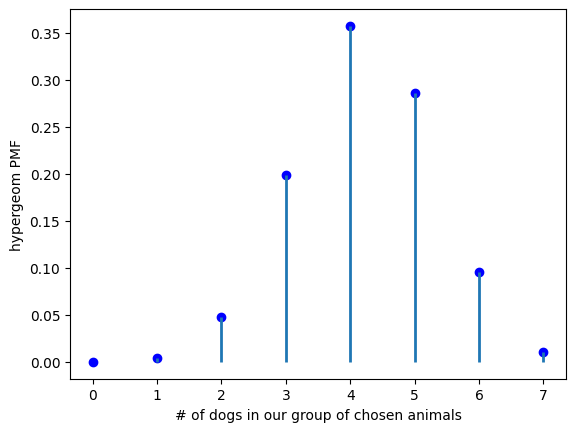

In [33]:
# Distribución Hipergeométrica
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

**Ejercicio:**
En una caja hay 10 celulares de los cuales hay 3 celulares dañados, Si se saca 5 celulares de la caja. ¿Cuál es la probabilidad de sacar un celular dañado?

Definiendo los parámtros a usar para definir la distribución hipergeométrica

In [34]:
[N,n,k]=[10,5,3]

Definiendo la función hipergeométrica con los parametros del ejercicio para usar en los calculos de probabilidades

In [35]:
rv=ss.hypergeom(N,n,k)

Calculando la probabilidad extacta de obtener un celular dañado en la muestra

In [36]:
print(rv.pmf(1))

0.4166666666666667
